# Day3_Least Squares and QR

In [60]:
import scipy
from scipy import linalg, matrix
from scipy.linalg import lu
import numpy as np

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

## Matrix Operation

### Scaling

In [103]:
A = matrix([1,0]).T

In [104]:
scale = matrix([[1/2, 0], [0, 1/2]])

In [105]:
scale*A

matrix([[ 0.5],
        [ 0. ]])

### Rotation

In [106]:
A = matrix([1,0]).T

In [107]:
rotation = matrix([[0, -1], [1, 0]]) # 90도 회전

In [108]:
rotation*A

matrix([[0],
        [1]])

### Reflection

In [109]:
A = matrix([1,0]).T

In [110]:
reflection = matrix([[-1, 0], [0, -1]])

In [111]:
reflection*A

matrix([[-1],
        [ 0]])

### Vector Plot

In [131]:
def plot_vector(vector) :
    origin = matrix([0, 0]).T
    plt.figure(figsize=(5,5))
    plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

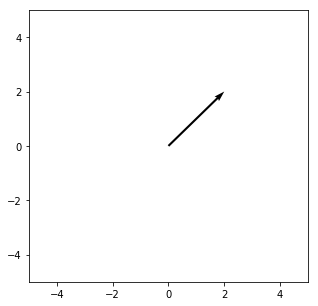

In [132]:
vector = matrix([2, 2]).T
plot_vector(vector)

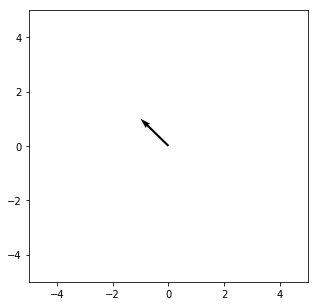

In [133]:
vector_new = rotation*scale*vector
plot_vector(vector_new)

## Linear Independence

In [197]:
vector1 = matrix([1, 2, 3]).T
vector2 = matrix([2, 4, 6]).T

In [204]:
(sum(sum(vector1/vector2)/3 == (vector1/vector2)) == 3)

matrix([[ True]], dtype=bool)

## Least Squares

In [186]:
A = matrix([[1, 2], [1,3], [0,0]])
b = matrix([4,5,6]).T

In [190]:
x, error, _, _ = linalg.lstsq(A, b)

In [195]:
x

array([[ 2.],
       [ 1.]])

In [194]:
A*np.asmatrix(x)

matrix([[ 4.],
        [ 5.],
        [ 0.]])

In [192]:
error

array([ 36.])

## QR-Factorization

In [205]:
A = matrix([[-1, -1, 1], [1, 3, 3], [-1, -1, 5], [1, 3, 7]])

In [206]:
A

matrix([[-1, -1,  1],
        [ 1,  3,  3],
        [-1, -1,  5],
        [ 1,  3,  7]])

In [207]:
Q, R = linalg.qr(A)

In [208]:
Q = np.asmatrix(Q)
Q

matrix([[-0.5, -0.5,  0.5,  0.5],
        [ 0.5, -0.5,  0.5, -0.5],
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5,  0.5]])

In [209]:
R = np.asmatrix(R)
R

matrix([[ 2.,  4.,  2.],
        [ 0., -2., -8.],
        [ 0.,  0., -4.],
        [ 0.,  0.,  0.]])

In [210]:
Q*R

matrix([[-1., -1.,  1.],
        [ 1.,  3.,  3.],
        [-1., -1.,  5.],
        [ 1.,  3.,  7.]])

## Applications

@Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

www.rdocumentation.org/packages/AppliedPredictiveModeling/versions/1.1-6/topics/solubility

In [211]:
import pandas as pd
from sklearn import linear_model

data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv(i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [212]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [213]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,2,0,2,0,1,1,0,0.492,37.30,37.30
21,1,0,1,1,0,1,0,0,0,0,...,3,1,2,0,0,0,0,1.317,52.32,52.32
23,0,1,0,0,1,0,0,0,0,1,...,6,0,2,0,0,0,1,0.846,40.46,40.46
25,0,0,1,0,0,1,0,0,0,0,...,5,2,0,0,0,0,1,0.984,24.06,24.06
28,1,1,0,1,1,1,0,1,0,0,...,6,2,1,0,0,0,1,0.843,55.98,55.98


In [246]:
data["solTestY"].head()

,x
1,0.93
2,0.85
3,0.81
4,0.74
5,0.61


In [220]:
model = linear_model.LinearRegression()
model.fit(train_data, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [228]:
predict_label = model.predict(test_data)

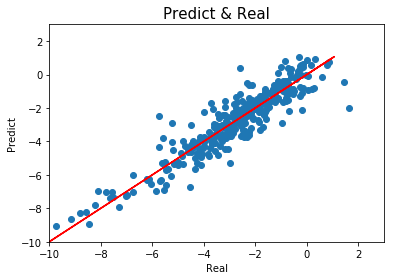

In [251]:
plt.scatter(predict_label, test_label.values)

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Real')
plt.ylabel('Predict')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(test_label, test_label, 'r-') 
plt.show()

In [231]:
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(predict_label, test_label))

R2 Score =  0.842905621876


In [240]:
model.coef_

array([[  2.25633815e-01,   9.78081747e-02,  -1.11170744e-01,
         -4.51897913e-01,  -4.34225202e-01,   6.79230364e-02,
         -7.57787871e-02,   2.90590908e-02,  -5.78940294e-01,
          6.62882405e-01,   1.39489100e-01,  -1.15812541e-01,
         -4.66803216e-01,   4.92224645e-01,  -3.87955761e-01,
          7.08993864e-02,  -1.73365118e-01,  -4.83347467e-01,
          1.13418263e-01,  -1.03645477e-02,   1.07869864e-01,
         -4.24774238e-02,  -4.69876755e-01,  -5.58804565e-01,
          2.64076886e-01,   3.39241208e-01,   2.14498523e-03,
          5.88892802e-02,  -5.50683429e-02,  -1.84285090e-01,
          2.31169806e-01,  -1.34080567e+00,   8.93020980e-01,
         -3.77451127e-01,  -1.71922623e-01,  -2.11431327e-02,
          6.76135720e-02,   2.45230928e-01,  -2.07237267e-01,
          6.23388955e-01,  -2.61059386e-01,  -8.18857881e-02,
          5.39851352e-01,  -4.21540007e-01,   1.15979832e-01,
         -1.61295086e-01,   6.37115261e-02,   3.35818159e-01,
        

In [242]:
model.intercept_

array([ -2.37680690e+09])

In [247]:
col_x = train_data.columns
col_y = train_label.columns
formul = ""
for i in range(0, len(model.coef_.reshape(-1))) :
    if model.coef_.reshape(-1)[i] != 0 :
        formul += str(model.coef_.reshape(-1)[i]) + " * " + col_x[i] + " + "

print("Formula : \n")
print(col_y[0], " = ", formul[:-3], '+', model.intercept_[0])

Formula : 

x  =  0.225633815314 * FP001 + 0.0978081746931 * FP002 + -0.111170744124 * FP003 + -0.451897912685 * FP004 + -0.434225201554 * FP005 + 0.0679230364387 * FP006 + -0.0757787870995 * FP007 + 0.0290590908435 * FP008 + -0.578940293766 * FP009 + 0.662882405166 * FP010 + 0.139489099518 * FP011 + -0.115812540674 * FP012 + -0.466803216376 * FP013 + 0.492224645201 * FP014 + -0.387955761165 * FP015 + 0.0708993863904 * FP016 + -0.173365118087 * FP017 + -0.483347466601 * FP018 + 0.113418262761 * FP019 + -0.0103645476795 * FP020 + 0.107869864179 * FP021 + -0.0424774238465 * FP022 + -0.469876755089 * FP023 + -0.558804565223 * FP024 + 0.264076886233 * FP025 + 0.339241208169 * FP026 + 0.00214498522704 * FP027 + 0.0588892802284 * FP028 + -0.0550683428724 * FP029 + -0.184285089662 * FP030 + 0.23116980566 * FP031 + -1.34080566535 * FP032 + 0.893020979774 * FP033 + -0.377451127215 * FP034 + -0.171922623476 * FP035 + -0.0211431327374 * FP036 + 0.0676135719768 * FP037 + 0.245230928254 * FP038 + -